In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
basis = pd.read_csv('basis.csv')
basis = basis.drop(columns=['Unnamed: 0', '__fileposition__'])
basis['date'] = pd.to_datetime(basis['date'], format='%Y%m%d')
basis['basis'] = basis['basis'].astype('float')

In [4]:
np.cumsum([0, 0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30])

array([  0,   0,  31,  60,  91, 121, 152, 182, 213, 244, 274, 305, 335])

In [5]:
DAYS = np.cumsum([0, 0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30])
for stat in ['basisAdditive', 'basisAdditiveAverage','basisRelative', 'basisRelativeAverage']:
    _ = pd.read_csv(stat + '.csv')
    _ = _.drop(columns=['Unnamed: 0', '__fileposition__', 'commodity'])
    if 'Average' in stat:
        _['averagebasis'] = _['averagebasis'].astype('float')
        _['D'] = _['day'] - 1
        _['D'] = _['D'].add(DAYS[_['month']])
        _ = _.sort_values(by='D')
    else:
        _['date'] = pd.to_datetime(_['date'], format='%Y%m%d')
        _['basis'] = _['basis'].astype('float')
    exec(f'{stat} = _')

In [6]:
f = lambda x: (123+x)%367
#_ = basisAdditiveAverage
_ = basisRelativeAverage
_['S'] = _['D'].apply(f)

In [12]:
#basisAdditiveAverage['S'] = basisAdditiveAverage['D'].apply(f)
basisRelativeAverage['S'] = basisRelativeAverage['D'].apply(f)

In [7]:
basisAdditiveAverage['D'].max()

365

Text(0.5, 1.0, 'Relative Average')

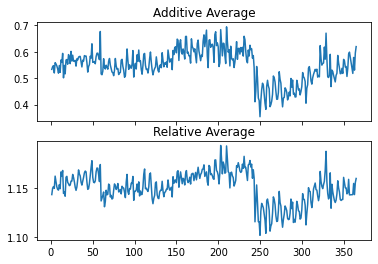

In [8]:
# for average
stat = basisAdditiveAverage
y = 'averagebasis'
fig, axes = plt.subplots(2, 1, sharex=True)

axes[0].plot(stat['D'], stat[y])
axes[0].set_title('Additive Average')

stat = basisRelativeAverage
axes[1].plot(stat['D'], stat[y])
axes[1].set_title('Relative Average')

Text(0.5, 1.0, 'Relative Average')

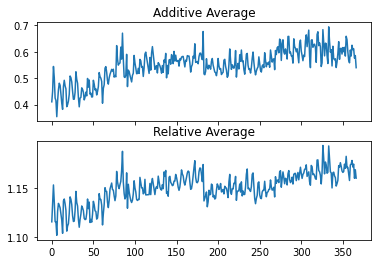

In [13]:
# for average
stat = basisAdditiveAverage
stat = stat.sort_values(by='S')
y = 'averagebasis'
fig, axes = plt.subplots(2, 1, sharex=True)

axes[0].plot(stat['S'], stat[y])
axes[0].set_title('Additive Average')

stat = basisRelativeAverage
stat = stat.sort_values(by='S')
axes[1].plot(stat['S'], stat[y])
axes[1].set_title('Relative Average')

In [ ]:
# for average
stat = basisAdditive
y = 'basis'
fig, axes = plt.subplots(2, 1, sharex=True)

axes[0].plot(stat['date'], stat[y])
axes[0].set_title('Additive')

stat = basisRelative
axes[1].plot(stat['date'], stat[y])
axes[1].set_title('Relative')

Let's look at the basis over time.

In [ ]:
plt.plot(basis['date'], basis['basis'])

Lot's of short-lived spikes.  But what's going on at the end?  It jumps > $3 and stays there at 2019-12-02.

In [ ]:
_df = basis[basis['date'] > '2019-10-01']
plt.plot(_df['date'], _df['basis'])

79 times basis is > $1. Max is $1.30

In [ ]:
# pd.set_option('display.max_rows', None)
basis[basis['basis']>1.].describe()

There are two negative basis values.  One is near zero.  But the other is signicant.  Is this legit?

In [ ]:
basis[basis['basis']<0.]

In [ ]:
# I think 2008-04-09 is erroneous
basis[(basis['date']>'2008-03-24') & (basis['date']<'2008-04-21')]